**FRAUD DETECTION PREDICTION**

* **step:**
    * Think of this as the hour of the day the transaction happened. So, step 1 is hour 1, step 2 is hour 2, and so on.

* **type:**
    * This tells you what kind of transaction it was:
        * **CASH-IN:** Putting money into an account.
        * **CASH-OUT:** Taking money out of an account.
        * **DEBIT:** Money taken out of an account for a purchase or expense.
        * **PAYMENT:** Paying for something.
        * **TRANSFER:** Moving money between accounts.

* **amount:**
    * The amount of money involved in the transaction.

* **nameOrig:**
    * The person who sent the money.

* **oldbalanceOrg:**
    * The amount of money the sender had before the transaction.

* **newbalanceOrig:**
    * The amount of money the sender had after the transaction.

* **nameDest:**
    * The person who received the money. (Note: if the name starts with "M", it's a business or merchant, and we don't know their balance info.)

* **oldbalanceDest:**
    * The amount of money the receiver had before the transaction.

* **newbalanceDest:**
    * The amount of money the receiver had after the transaction.

* **isFraud:**
    * This tells you if the transaction was fraudulent (a scam) or not. (1 = fraudulent, 0 = not fraudulent).


**The "isFraud" column labels transactions as fraudulent (1) or legitimate (0) within a simulated financial system where agents steal money by first taking control of customer accounts, then transferring (TRANSFER) funds to their own accounts, and finally withdrawing the stolen money as cash (CASH_OUT).**


In [5]:
import pandas as pd

# Load the dataset
file_path = "Fraud_Analysis_Dataset(in).csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [2]:
df.head()

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1

In [3]:
df.tail()

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
11137     7     DEBIT    6393.71  C1331144930      433084.38       426690.68   
11138     7  CASH_OUT  298799.54   C932023579      426690.68       127891.14   
11139     7  CASH_OUT  423159.63    C61395726      127891.14            0.00   
11140     7   PAYMENT    1094.03  C1224570697       13918.00        12823.97   
11141     7   PAYMENT    9235.58  C1637966097       39963.00        30727.42   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  
11137   C684896216       478421.00       210535.25        0  
11138  C1761353343       704355.36      5270364.19        0  
11139  C1298316171       610479.00       749621.53        0  
11140   M983553548            0.00            0.00        0  
11141   M609545864            0.00            0.00        0

In [4]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e+06    2.089894e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.946618e+03   4.270000e+02    0.000000e+00   
50%        6.000000  1.676126e+04   2.816950e+04    4.420605e+03   
75%        7.000000  1.543366e+05   3.040855e+05    1.114126e+05   
max       95.000000  1.000000e+07   1.990000e+07    1.300000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.114200e+04    1.114200e+04  11142.000000  
mean     8.883541e+05    1.103211e+06      0.102495  
std      2.601376e+06    2.982447e+06      0.303312  
min      0.000000e+00    0.000000e+00      0.000000  
25%      0.000000e+00    0.000000e+00      0.000000  
50%      0.000000e+00    0.000000e+00      0.000000  
75%      2.711555e+05    3.186374e+05      0.000000  
max      3.300000e+07    3.460000e+07      1.000000

In [5]:
df.shape

(11142, 10)

The dataset has 11,142 transactions with 10 features.

In [6]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generate Profile Report
profile = ProfileReport(df, explorative=True)

# Display Report in VS Code (Jupyter Notebook or Interactive Window)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Class Imbalance in Percentage:
isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64


C:\Users\Ashrith\AppData\Local\Temp\ipykernel_9876\3578898388.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')


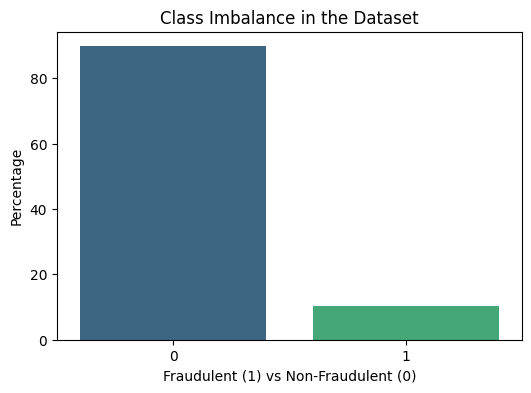

In [6]:
# Check fraud distribution
fraud_counts = df["isFraud"].value_counts(normalize=True) * 100

# Check fraud distribution per transaction type
fraud_by_type = df.groupby("type")["isFraud"].mean() * 100

# Display class distribution
print("Class Imbalance in Percentage:")
print(fraud_counts)

# Visualize class imbalance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.xlabel("Fraudulent (1) vs Non-Fraudulent (0)")
plt.ylabel("Percentage")
plt.title("Class Imbalance in the Dataset")
plt.show()
   

isFraud is binary (0: non-fraud, 1: fraud).

90% transactions are non-fraudulent, while 10% are fraudulent.

In [19]:
fraud_by_type

type
CASH_IN      0.000000
CASH_OUT    30.892571
DEBIT        0.000000
PAYMENT      0.000000
TRANSFER    38.524590
Name: isFraud, dtype: float64

Fraud Transactions by Transaction Type:
type
CASH_OUT    578
TRANSFER    564
Name: count, dtype: int64


C:\Users\Ashrith\AppData\Local\Temp\ipykernel_9876\1044137659.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_transactions.index, y=fraud_transactions.values, palette='Reds')


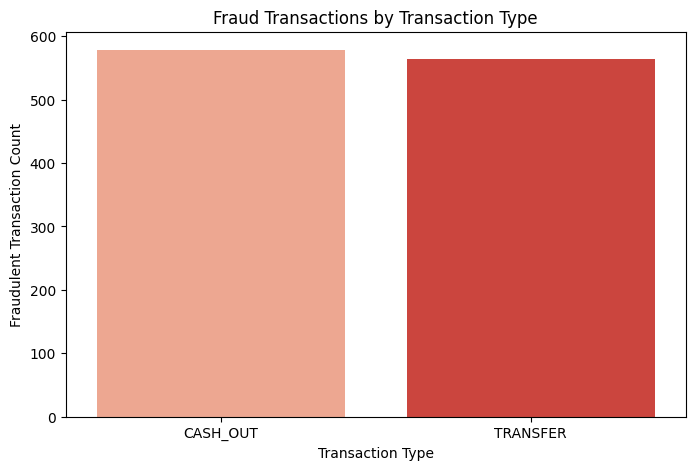

In [8]:
# Count fraudulent transactions by transaction type
fraud_transactions = df[df['isFraud'] == 1]['type'].value_counts()

# Display fraud transaction counts
print("Fraud Transactions by Transaction Type:")
print(fraud_transactions)

# Visualize fraud transactions by type
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_transactions.index, y=fraud_transactions.values, palette='Reds')
plt.xlabel("Transaction Type")
plt.ylabel("Fraudulent Transaction Count")
plt.title("Fraud Transactions by Transaction Type")
plt.show()

Transaction types include TRANSFER, CASH_OUT, PAYMENT, DEBIT, CASH-IN.

Fraud Occurrence per Transaction Type:

TRANSFER: 38.52% (564) fraud cases → Fraudsters initiate transfers to empty accounts.

CASH_OUT: 30.89% (578) fraud cases → Fraudsters withdraw stolen money.

CASH-IN, DEBIT, PAYMENT: 0% fraud → No fraudulent activity detected.


Fraudulent transactions often empty the sender’s account (newbalanceOrig = 0) and leave the recipient’s balance unchanged (oldbalanceDest = 0, newbalanceDest = 0).

**Explore balance changes before and after transactions to identify fraud patterns.**

C:\Users\Ashrith\AppData\Local\Temp\ipykernel_34400\1749570007.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Old Balance (Origin)", "New Balance (Origin)"])
C:\Users\Ashrith\AppData\Local\Temp\ipykernel_34400\1749570007.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Old Balance (Destination)", "New Balance (Destination)"])


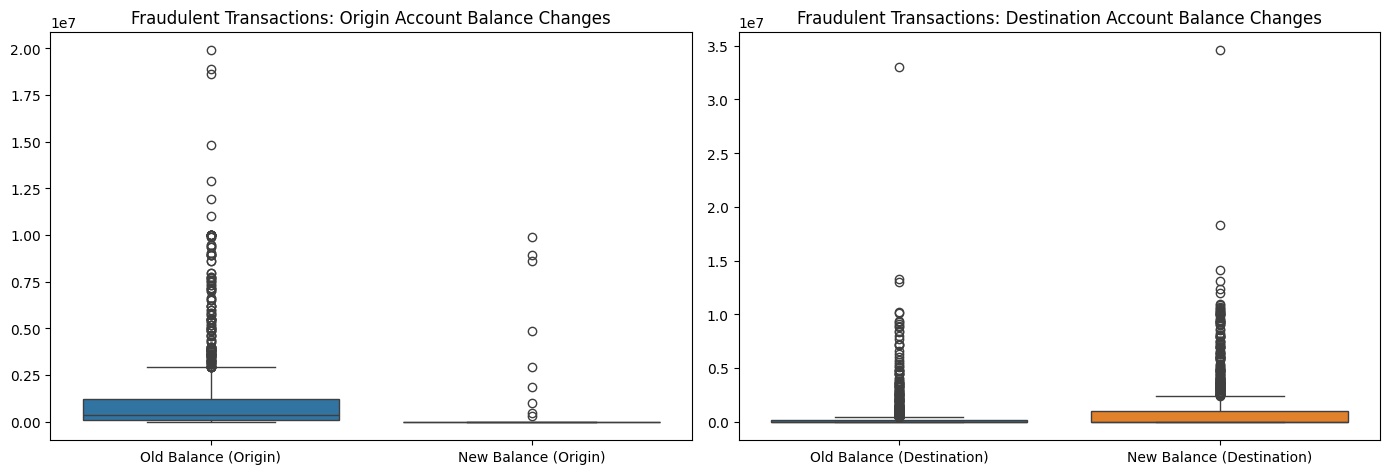

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraudulent and non-fraudulent transactions
fraud_df = df[df["isFraud"] == 1]
non_fraud_df = df[df["isFraud"] == 0]

# Plot distributions of balance changes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=[fraud_df["oldbalanceOrg"], fraud_df["newbalanceOrig"]], ax=axes[0])
axes[0].set_xticklabels(["Old Balance (Origin)", "New Balance (Origin)"])
axes[0].set_title("Fraudulent Transactions: Origin Account Balance Changes")

sns.boxplot(data=[fraud_df["oldbalanceDest"], fraud_df["newbalanceDest"]], ax=axes[1])
axes[1].set_xticklabels(["Old Balance (Destination)", "New Balance (Destination)"])
axes[1].set_title("Fraudulent Transactions: Destination Account Balance Changes")

plt.tight_layout()
plt.show()


**Insights from Balance Change Analysis**

---> Fraudulent Transactions - Origin Account

Old balance (oldbalanceOrg) is high, but newbalanceOrig drops to zero.

This suggests that fraudsters completely drain the sender’s account.

----> Fraudulent Transactions - Destination Account

Both oldbalanceDest and newbalanceDest are often zero.

This indicates that fraudulent transfers are often sent to empty or fake accounts.

**Create new features to capture suspicious patterns**

**New Feature Analysis**

---> Balance Differences (balance_diff_orig, balance_diff_dest)

Fraudulent transactions deplete sender's balance (balance_diff_orig ≈ amount).

Fraudulent recipients often start with zero balance (balance_diff_dest = 0).

---> Transaction Ratio (transaction_ratio)

Fraudulent transactions consume nearly 100% of sender’s balance (≈1.0).

---> New Recipient Flag (is_new_dest)

Fraudulent transactions often go to new accounts (is_new_dest = 1).

In [21]:
# Feature Engineering - Creating new features
# Balance difference 
df["balance_diff_orig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balance_diff_dest"] = df["oldbalanceDest"] - df["newbalanceDest"]

# Transaction percentage of total balance
df["transaction_ratio"] = df["amount"] / (df["oldbalanceOrg"] + 1)  # Avoid division by zero

# Is the recipient a new account? Check if oldbalanceDest = 0
df["is_new_dest"] = (df["oldbalanceDest"] == 0).astype(int)  # 1 if recipient had zero balance before transaction

# Check the new features
df[["balance_diff_orig", "balance_diff_dest", "transaction_ratio", "is_new_dest", "isFraud"]].head()


balance_diff_orig  balance_diff_dest  transaction_ratio  is_new_dest  \
0              181.0                0.0           0.994505            1   
1              181.0            21182.0           0.994505            0   
2             2806.0                0.0           0.999644            1   
3             2806.0            26202.0           0.999644            0   
4            20128.0                0.0           0.999950            1   

   isFraud  
0        1  
1        1  
2        1  
3        1  
4        1

**Data Preperation**

Categorical Encoding: Transaction type converted to numerical values.

Feature Selection: Used key fraud-related features.

Feature Scaling: Standardized numeric features for better model performance.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Encode categorical feature 'type' if it's not numeric
df["type"] = LabelEncoder().fit_transform(df["type"])

# Select features
features = ["type", "amount", "balance_diff_orig", "balance_diff_dest", "transaction_ratio", "is_new_dest"]
X = df[features]
y = df["isFraud"]

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler to use on deployment
#scaler_path = "models/scaler.save"
#joblib.dump(scaler, scaler_path)

# Print first 5 rows of scaled data
print("Scaled data:\n", X_scaled[:5, :])

Scaled data:
 [[ 1.30119441 -0.28026556 -0.13146216  0.19221802 -0.21542983  0.85998747]
 [-0.91572411 -0.28026556 -0.13146216  0.21116809 -0.21542983 -1.16280763]
 [ 1.30119441 -0.27681175 -0.12797567  0.19221802 -0.2154298   0.85998747]
 [-0.91572411 -0.27681175 -0.12797567  0.21565914 -0.2154298  -1.16280763]
 [ 1.30119441 -0.25402057 -0.1049688   0.19221802 -0.2154298   0.85998747]]


In [25]:
from sklearn.model_selection import train_test_split
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check data shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8913, 6), (2229, 6), (8913,), (2229,))

Train-Test Split:

80% (8,913 records) for training

20% (2,229 records) for testing

**MODEL TRAINING**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Select features and target variable
features = ["type", "amount", "balance_diff_orig", "balance_diff_dest", "transaction_ratio", "is_new_dest"]
X = df[features]
y = df["isFraud"]

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(class_weight="balanced", probability=True, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=10, random_state=42, eval_metric="logloss")
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    roc_auc = round(roc_auc_score(y_test, y_pred_prob), 4) if y_pred_prob is not None else "N/A"
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append([
        name,
        accuracy,
        roc_auc,
        round(report["1"]["precision"], 4),
        round(report["1"]["recall"], 4),
        round(report["1"]["f1-score"], 4)
    ])

# Convert results to DataFrame for better visualization
columns = ["Model", "Accuracy", "ROC-AUC", "Fraud Precision", "Fraud Recall", "F1 Score"]
results_df = pd.DataFrame(results, columns=columns)
print(results_df)


                 Model  Accuracy  ROC-AUC  Fraud Precision  Fraud Recall  \
0  Logistic Regression    0.9659   0.9630           0.8455        0.8158   
1        Decision Tree    0.9937   0.9790           0.9777        0.9605   
2        Random Forest    0.9973   0.9900           1.0000        0.9737   
3             AdaBoost    0.9960   0.9977           0.9955        0.9649   
4                  SVM    0.9614   0.9593           0.8515        0.7544   
5              XGBoost    0.9951   0.9976           0.9780        0.9737   

   F1 Score  
0    0.8304  
1    0.9690  
2    0.9867  
3    0.9800  
4    0.8000  
5    0.9758  


                 Model  Accuracy  ROC-AUC  Fraud Precision  Fraud Recall  \
0  Logistic Regression    0.9659   0.9630           0.8455        0.8158   
1        Decision Tree    0.9937   0.9790           0.9777        0.9605   
2             AdaBoost    0.9959   0.9977           0.9955        0.9649   
3                  SVM    0.9614   0.9593           0.8515        0.7544   
4        Random Forest    0.9973   0.9900           1.0000        0.9737   
5              XGBoost    0.9951   0.9976           0.9779        0.9737   

   F1 Score  
0    0.8303  
1    0.9690  
2    0.9799  
3    0.8000  
4    0.9867  
5    0.9758  


C:\Users\Ashrith\AppData\Local\Temp\ipykernel_34400\1056136888.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_results, palette="viridis")


<Figure size 1200x600 with 0 Axes>

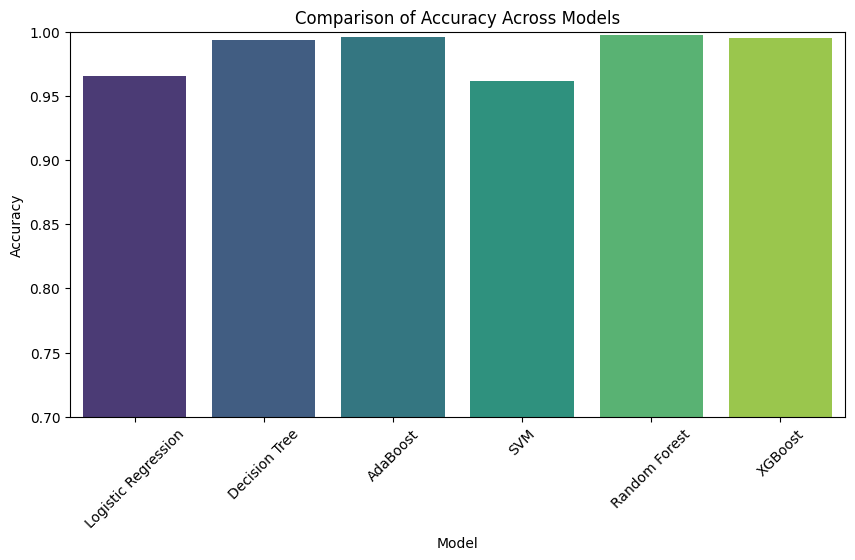

C:\Users\Ashrith\AppData\Local\Temp\ipykernel_34400\1056136888.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_results, palette="viridis")


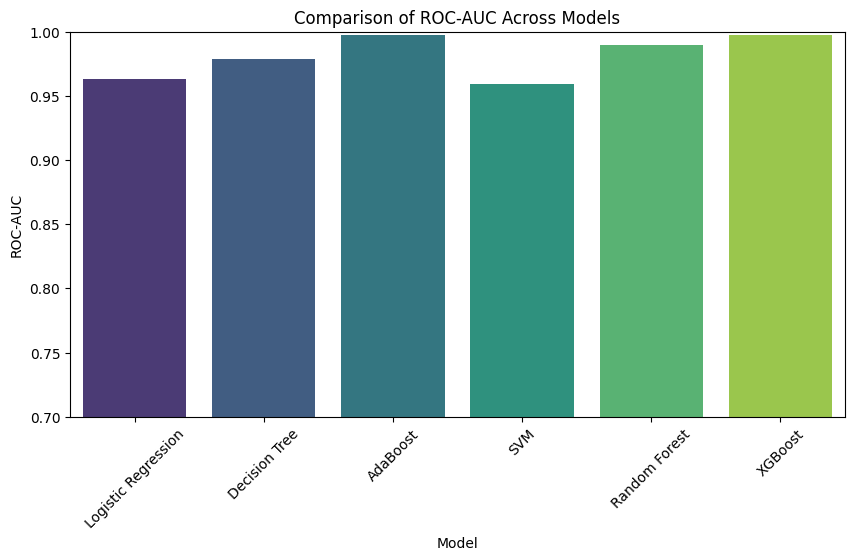

C:\Users\Ashrith\AppData\Local\Temp\ipykernel_34400\1056136888.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_results, palette="viridis")


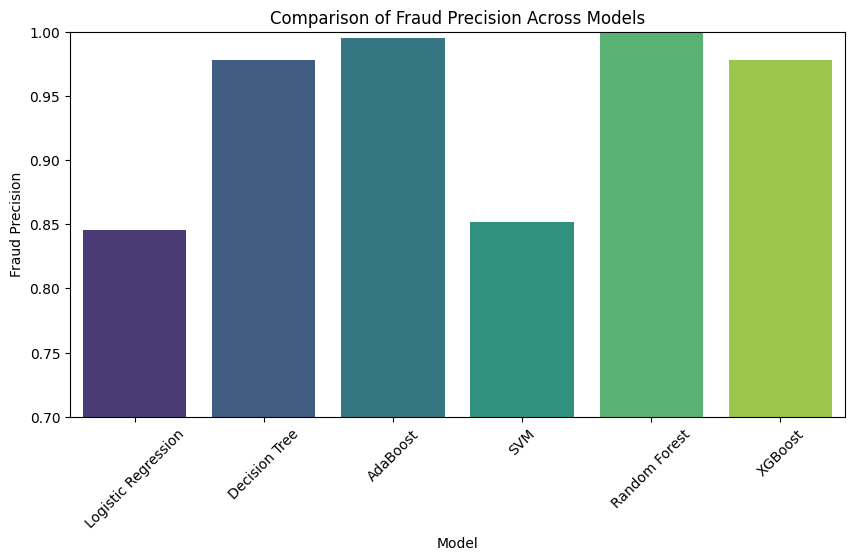

C:\Users\Ashrith\AppData\Local\Temp\ipykernel_34400\1056136888.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_results, palette="viridis")


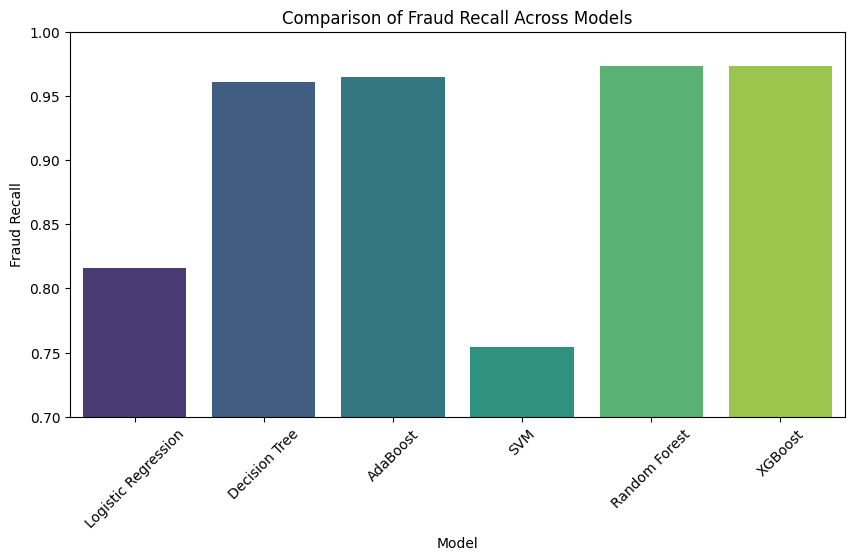

C:\Users\Ashrith\AppData\Local\Temp\ipykernel_34400\1056136888.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_results, palette="viridis")


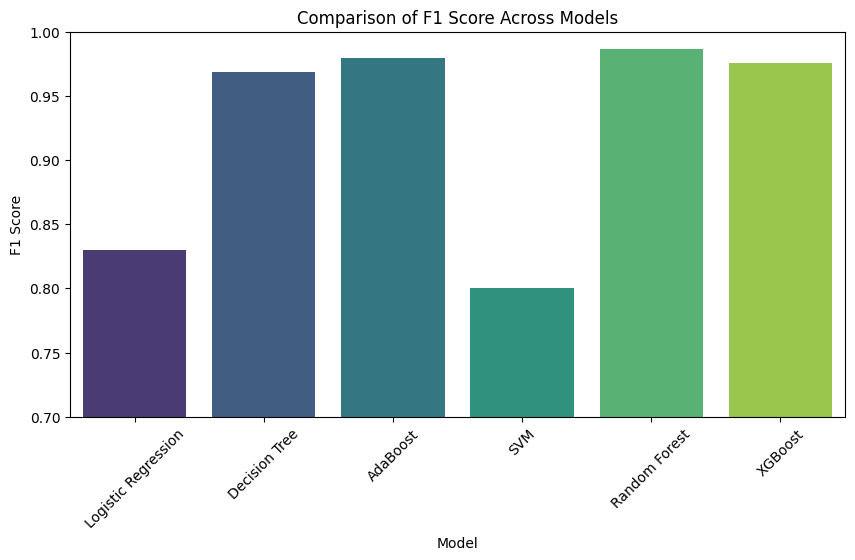

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with model results
data = {
    "Model": [
        "Logistic Regression", "Decision Tree", "AdaBoost", "SVM", 
        "Random Forest", "XGBoost"
    ],
    "Accuracy": [0.9659, 0.9937, 0.9959, 0.9614, 0.9973, 0.9951],
    "ROC-AUC": [0.963, 0.979, 0.9977, 0.9593, 0.9900, 0.9976],
    "Fraud Precision": [0.8455, 0.9777, 0.9955, 0.8515, 1.0000, 0.9779],
    "Fraud Recall": [0.8158, 0.9605, 0.9649, 0.7544, 0.9737, 0.9737],
    "F1 Score": [0.8303, 0.969, 0.9799, 0.8, 0.9867, 0.9758]
}

df_results = pd.DataFrame(data)

# Display the table
print(df_results)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar charts for comparison
metrics = ["Accuracy", "ROC-AUC", "Fraud Precision", "Fraud Recall", "F1 Score"]
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Model", y=metric, data=df_results, palette="viridis")
    plt.title(f"Comparison of {metric} Across Models")
    plt.xticks(rotation=45)
    plt.ylim(0.7, 1)  # Set consistent y-axis scale
    plt.ylabel(metric)

    plt.show()


**Why Precision, Recall, and F1-Score Matter for Fraud Detection?**

----> Fraudulent Transactions are Rare (Imbalanced Data)

Accuracy alone can be misleading because fraud cases are significantly fewer than non-fraud cases.

A model that predicts "No Fraud" for every transaction would still have high accuracy but would be useless.

-----> Recall is Crucial for Catching Fraud


**Recall (True Positives / Actual Fraud Cases)**  
Recall (Fraud Class) = TP / (TP + FN)
:tells us how many fraudulent transactions the model correctly identifies.

Missing fraud cases (false negatives) can be very costly in financial security.

-----> Precision Prevents False Alarms

**Precision (True Positives / Predicted Fraud Cases)**
 Precision (Fraud Class) = TP / (TP + FP): ensures that flagged fraud cases are actually fraudulent.

A model with **high recall but low precision** will detect more fraud cases but may also incorrectly classify genuine transactions as fraud, causing customer inconvenience.

**F1-Score (Fraud Class) = 2 × (Precision × Recall) / (Precision + Recall)**

Balances Precision & Recall (useful when both are important).

A higher F1-score means better fraud detection performance.

---------------------------------------------------------------------------------------------

**BEST PERFORMING MODEL:**

✅ Best Model: Random Forest

Fraud Precision: 1.0000 (Perfect Precision!) ensures that flagged fraud cases are actually fraudulent.

Fraud Recall: 0.9737 , how many fraudlent transactionsthe model correctly identifies.

F1-Score: 0.9867

ROC-AUC: 0.9900

This means it correctly identifies all fraud cases without false alarms, making it the best-performing model.


🏆 Other Strong Models:

AdaBoost (F1: 0.9799, ROC-AUC: 0.9977) 

XGBoost (F1: 0.9758, ROC-AUC: 0.9976) 

are very strong contenders as well.

**Which Model is Not Performing Well?**

❌ Worst Model: SVM

Fraud Recall: 0.7544 (Misses many fraud cases)

Fraud Precision: 0.8515

F1-Score: 0.8000 (Lowest among all models)

ROC-AUC: 0.9593 (Lowest AUC score)

Conclusion: SVM struggles to identify fraud cases, making it a poor choice for fraud detection.

------------------------------------------------------------------------------

**Model Evaluation of Random Forest**

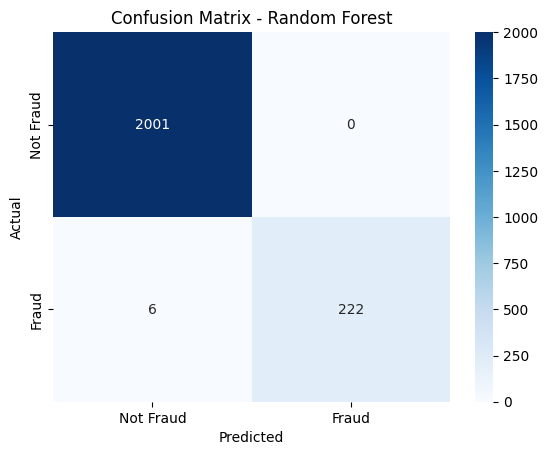

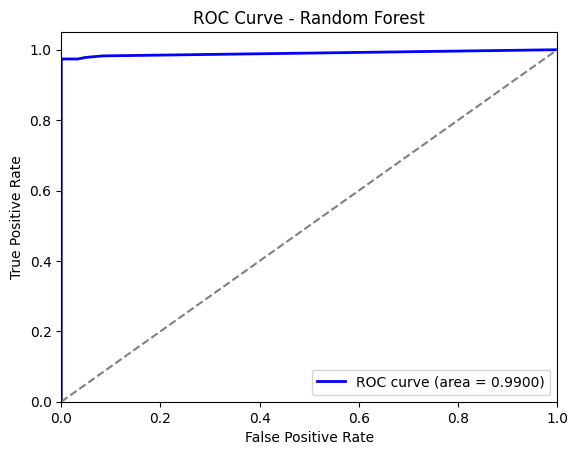

In [32]:
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, 
                             confusion_matrix, roc_curve, auc)

# Model evaluation for the best-performing model: Random Forest
best_model = models["Random Forest"]
y_pred_best = best_model.predict(X_test)
y_pred_prob_best = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

**Confusion Matrix**

 This confusion matrix evaluates the **performance of the Random Forest model** in fraud detection.  

1️⃣ **True Positives (TP) = 222**  
   - The model correctly predicted **222 fraudulent transactions** as fraud.  

2️⃣ **True Negatives (TN) = 2001**  
   - The model correctly predicted **2001 genuine transactions** as non-fraud.  

3️⃣ **False Positives (FP) = 0**  
   - The model did not mistakenly classify any **genuine transactions as fraud** (which is great because it reduces unnecessary alerts).  

4️⃣ **False Negatives (FN) = 6**  
   - The model incorrectly classified **6 fraudulent transactions as non-fraud**, meaning it **missed detecting 6 fraud cases**.  

### **Key Performance Insights:**  
✔ **High Accuracy** – Most predictions are correct, with **only 6 misclassifications**.  
✔ **No False Positives** – This means the model does not falsely flag genuine transactions, reducing inconvenience to users.  
✔ **Few False Negatives** – While the model is highly accurate, **6 fraud cases were missed**, which could be critical in real-world fraud detection.  


 The ROC curve lets you see how well your model performs when you adjust how strict it is about flagging something as Fraud.

 AUC score tells you how good your model is differentiating real fraud and normal transactions, even when there are far fewer fraud cases.


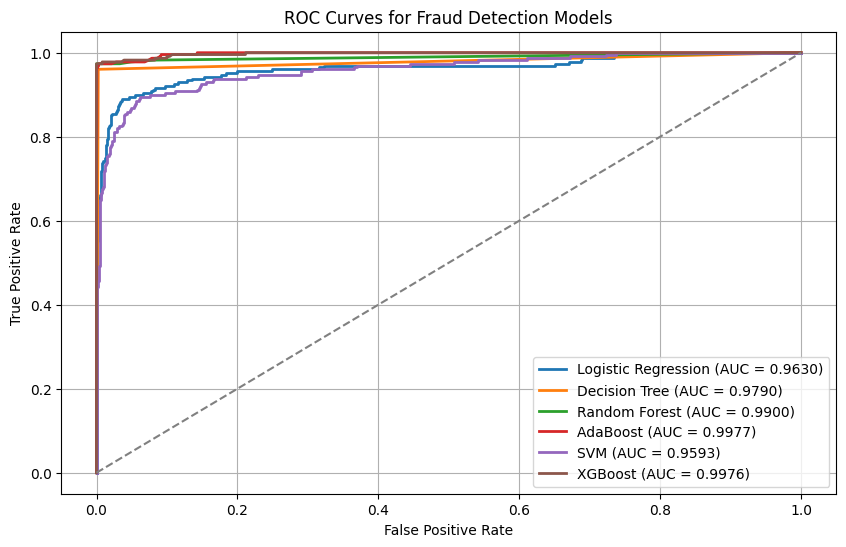

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Check if the model supports probability prediction
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.4f})")

# Plot random guessing line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Graph aesthetics
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Fraud Detection Models")
plt.legend(loc="lower right")
plt.grid()

# Show plot
plt.show()


Excellent models.

RandomForest (AUC=99.00)

AdaBoost (AUC = 0.9977)

XGBoost (AUC = 0.9976) 

Least Effective.

SVM (AUC = 0.9593) → Least effective at distinguishing fraud from non-fraud.